In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Read the data
best_100 = pd.read_csv('top_best_100.csv')
worst_100 = pd.read_csv('top_worst_100.csv')
best_text = pd.read_csv('top_best_text.csv')
worst_text = pd.read_csv('top_worst_text.csv')

In [3]:
# Check shape for each dataset
print('Shape of best_100: ', best_100.shape)    
print('Shape of worst_100: ', worst_100.shape)
print('Shape of best_text: ', best_text.shape)
print('Shape of worst_text: ', worst_text.shape)

Shape of best_100:  (100, 3)
Shape of worst_100:  (100, 3)
Shape of best_text:  (21131, 2)
Shape of worst_text:  (15418, 2)


In [4]:
# from column 'text', extract the most common words
from collections import Counter
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
punct = string.punctuation
stop.extend(punct)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Create a function to extract the most common words from the text column
def common_words(df):
    words = []
    for i in df['review_text']:
        words.extend(i.split())
    words = [word.lower() for word in words if word.lower() not in stop]
    return Counter(words).most_common(200)


In [12]:
best_words = pd.DataFrame(common_words(best_text), columns=['word', 'count'])
best_words

,word,count
0,food,10117
1,place,8754
2,great,7778
3,good,5074
4,best,4970
...,...,...
195,parking,695
196,bowl,694
197,tea,693
198,special,692


In [14]:
# Create a list of words that are not relevant to the analysis
ignore_words_best = ["food", "great", "good", "best", "like", "one", "get", "also", "try", "go", "definitely", "back", "really", "got", "love", "i've", "time", "would", "delicious", "everything", "little", "i'm", "ordered", "made", "amazing", "sandwich", "even", "nice", "chicken", "make", "super", "first", "always", "us", "come", "order", "ever", "restaurant", "it.", "recommend", "can't", "eat", "came", "pizza", "food.", "tried", "every", "could", "favorite", "good.", "well", "worth", "highly", "next", "two", "much", "went", "loved", "never", "right", "sure", "know", "take", "absolutely", "give", "going", "want", "amazing.", "many", "find", "say", "way", "found", "perfect", "something", "since", "excellent", "food,", "think", "stop", "see", "side", "different", "here.", "husband", "meal", "wonderful", "visit", "still", "better", "coming", "must", "took", "enjoyed", "awesome", "well.", "day", "bit", "everyone", "eating", "long", "back.", "top", "great.", "i'll", "yelp", "amazing!", "wish", "another", "decided", "too.", "places", "wanted", "makes", "glad", "let", "had.", "st.", "things", "wife", "tell", "said"
]

In [17]:
# Delete the ignore_words_best from the best_words dataframe
best_words = best_words[~best_words['word'].isin(ignore_words_best)]

# Reset the index
best_words = best_words.reset_index(drop=True)
best_words
    

,word,count
0,place,8754
1,fresh,3304
2,friendly,3179
3,service,3089
4,staff,2603
...,...,...
73,parking,695
74,bowl,694
75,tea,693
76,special,692


In [7]:
# Install wordcloud
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


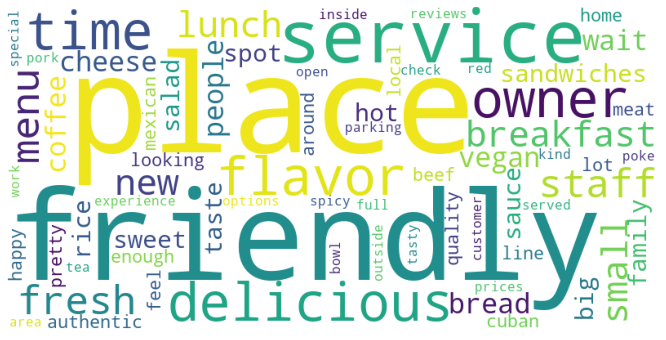

In [18]:
# Plot best_words with a word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(best_words['word']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [19]:
worst_words = pd.DataFrame(common_words(worst_text), columns=['word', 'count'])
worst_words.head()

,word,count
0,food,9348
1,get,6604
2,one,5495
3,place,5458
4,order,5248


In [20]:
# Word to ignore
worst_words_ignore = ["food", "get", "one", "like", "would", "even", "go", "minutes", "got", "us", "ordered", "never", "back", "good", "came", "asked", "took", "said", "could", "i'm", "really", "told", "went", "come", "i've", "give", "another", "going", "it.", "ever", "restaurant", "two", "know", "worst", "take", "still", "always", "great", "food.", "eat", "also", "bad", 2, "first", "make", "around", "want", "long", "pretty", "customer", "much", "better", "way", "say", "made", "finally", "hour", "new", "see", "last", "ask", "think", 10, 3, "wanted", "little", "right", "sure", "nice", "here.", "since", "order.", "something", 20, "half", "every", "gave", 5, "sat", "good.", "well", "left", "can't", "love", "put", "next", "someone", "called", "pizza", "many", "that's", 15, "again.", "need", "nothing", 30, "decided", "actually", "looked", "try", "meal", "front", "least", "food,", "getting", "me.", "without", "menu", "place.", "tell", "definitely", "probably", "tried", "terrible", "everything", "almost", "fast", "thing", "back.", "out.", "there.", "lot", "coming", "best", "find", "let", "anything", "maybe", "person", 4, "thought", "brought", "though", "away", "look", "later", "seemed"
]

In [21]:
# Delete the ignore_words_best from the best_words dataframe
worst_words = worst_words[~worst_words['word'].isin(worst_words_ignore)]

# Reset the index
worst_words = worst_words.reset_index(drop=True)
worst_words   

,word,count
0,place,5458
1,order,5248
2,service,4813
3,time,4334
4,people,2447
...,...,...
66,4,697
67,open,693
68,sitting,681
69,hotel,680


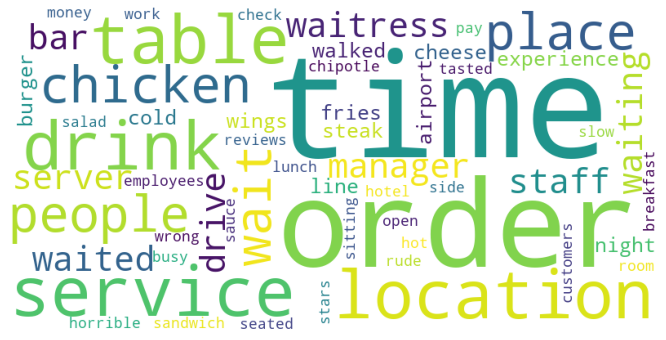

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(worst_words['word']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [23]:
# Save the best_words and worst_words to csv files
best_words.to_csv('best_words.csv', index=False)
worst_words.to_csv('worst_words.csv', index=False)

In [25]:
# Install textblob
!pip install textblob

# Perform sentiment analysis on the best_100 and worst_100 datasets
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

Defaulting to user installation because normal site-packages is not writeable


In [31]:
# Join top_best_100 with top_best_text using the business_id column
top_best = pd.merge(best_100, best_text, on='business_id')
top_best.head()

,business_id,name,AVG(r.stars),review_text
0,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,The owner is very knowledgeable and very much ...
1,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,Where do I start!? The owner Rio immediately h...
2,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,I read about this tea shop several times and f...
3,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,"I love this place very casual and friendly , t..."
4,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,Teatopia was recommended to me by the people a...


In [32]:
# Create a function to perform sentiment analysis
def sentiment_analysis(df):
    df['polarity'] = df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['subjectivity'] = df['review_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    df['sentiment'] = df['AVG(r.stars)'].apply(lambda x: 'positive' if x > 3 else ('negative' if x < 3 else 'neutral'))
    return df

In [28]:
best_100.head() 

,business_id,name,AVG(r.stars)
0,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712
1,8q25GCkL0PngPIlCu2j4Vw,Pangolin Café,4.9712
2,slO-qEE0z8-BLRTvMYW6HA,The Mediterranean Chickpea,4.9427
3,S5LnH1njwFBlq77tIkjI1g,Yolk White & Associates,4.9304
4,YnGlopjmCYM6Pw07qt9bfw,Mio’s Grill & Cafe,4.9304


In [39]:
# Perform sentiment analysis on the best_100 and worst_100 datasets
best_100 = sentiment_analysis(top_best)
best_100

,business_id,name,AVG(r.stars),review_text,polarity,subjectivity,sentiment
0,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,The owner is very knowledgeable and very much ...,0.480000,0.490000,positive
1,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,Where do I start!? The owner Rio immediately h...,0.418056,0.622569,positive
2,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,I read about this tea shop several times and f...,0.372500,0.665556,positive
3,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,"I love this place very casual and friendly , t...",0.156250,0.750000,positive
4,L4JFBsgfLZIL9SJ5uxXgJw,Teatopia,4.9712,Teatopia was recommended to me by the people a...,0.112500,0.515801,positive
...,...,...,...,...,...,...,...
21126,dISs1oH_xeNAOOEcmJiGZQ,Cajun Kate's,4.7692,I went here looking for a good shrimp po-boy l...,0.207549,0.640584,positive
21127,dISs1oH_xeNAOOEcmJiGZQ,Cajun Kate's,4.7692,This place has great food and good people. I g...,0.442857,0.564286,positive
21128,dISs1oH_xeNAOOEcmJiGZQ,Cajun Kate's,4.7692,We flew in a few hours early for a wedding in ...,0.301865,0.510899,positive
21129,dISs1oH_xeNAOOEcmJiGZQ,Cajun Kate's,4.7692,Made a return journey with the kids. Lucky eno...,0.278056,0.541481,positive
